### 단순 선형 회귀

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 아버지와 아들의 키 - Galton

In [3]:
df = pd.read_csv('data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 전처리
    - 아버지와 아들의 키만 발췌
    - 컬럼명을 Father, Son 으로 변경
    - 단위(1 inch --> 2.54 cm) 변경

In [4]:
# filtering
df = df[df.Gender == 'M']
df.head(3)

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4


In [5]:
df = df[['Father', 'Height']]
# df = df[['Father', 'Son']]
df.rename(columns={'Height' : 'Son'}, inplace=True)
df.head()

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5


In [6]:
# 단위 변경
df = df * 2.54
df.tail(3)

,Father,Son
892,173.99,174.498
893,173.99,173.990
894,173.99,171.958


- 산점도

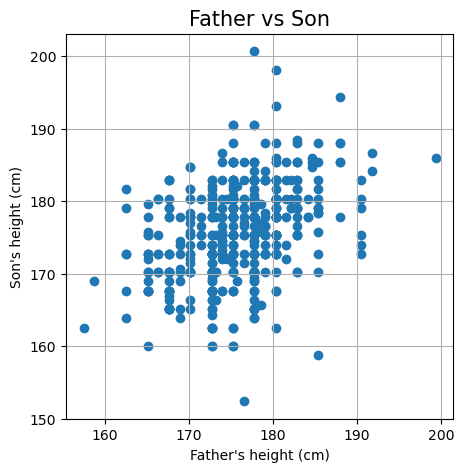

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(df.Father, df.Son)
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son', fontsize=15)
plt.grid()
plt.show()

- 회귀선

##### Least Square Method
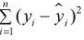
- yi = wxi + b
- wxi + b - yi / xi와 yi는 상수 / w(가중치)와 b(bias) 찾는다!

In [8]:
weight, bias = np.polyfit(df.Father, df.Son, deg=1)     # X, Y, degree(차수)
weight, bias

(0.4477479176030235, 97.1776370073937)

In [9]:
np.polyfit(df.Father, df.Son, 2)
# ax^2 + bx + c

array([6.10561389e-04, 2.32817725e-01, 1.16071746e+02])

In [10]:
# X 축의 최소값, 최대값
df.Father.min(), df.Father.max()

(157.48, 199.39000000000001)

In [ ]:
f1 = np.poly1d(np.polyfit(df.Father, df.Son, deg=1))

In [11]:
# 회귀선(직선)
xs = np.array([df.Father.min(), df.Father.max()])
ys = weight * xs + bias
ys

array([167.68897907, 186.4540943 ])

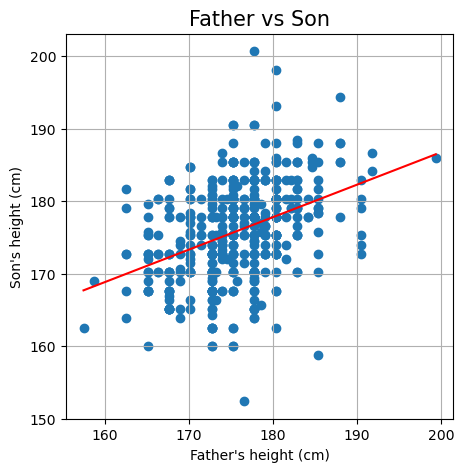

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(df.Father, df.Son)
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son', fontsize=15)
plt.plot(xs, ys, color='red')
plt.grid()
plt.show()

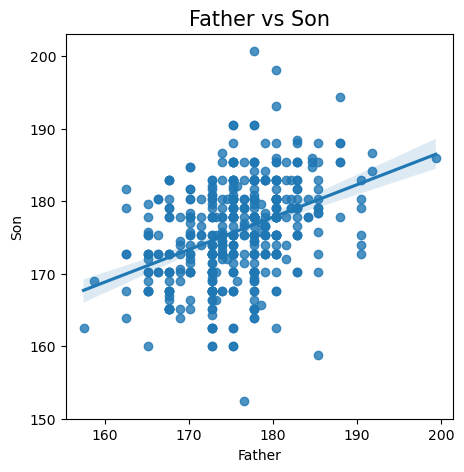

In [23]:
plt.figure(figsize=(5,5))
sns.regplot(data=df, x='Father', y='Son')
plt.title('Father vs Son', fontsize=15)
plt.show()

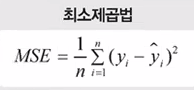

- 0 < R-Sqruared(결정계수) < 1 : 1에 가까울 수록 설명력이 높다. / 회귀선에 가깝게 분포
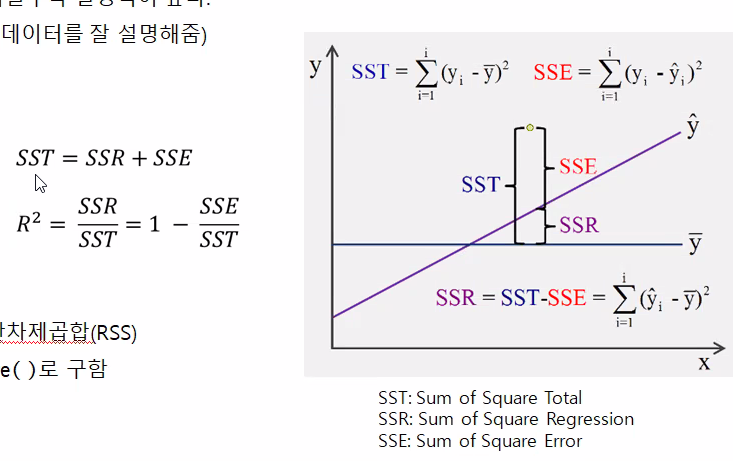
- SSR : 설명력
- R^2 = 1 - SSE/SST = 1 - 0.2 = 0.8 : 설명력이 높다.
- R^2 = 1 - SSE/SST = 1 - 0.8 = 0.2 : 설명력이 낮다.(SSE 구간이 넓다)

- Scikit-Learn으로 회귀식 구하기

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [25]:
# 학습 / df.Father(Series) > df[['Father']](DataFrame) > 2차원이 되어야 함.
lr.fit(df[['Father']], df.Son)

LinearRegression()

In [26]:
X = df.Father.values.reshape(-1, 1)     # row가 여려개
y = df.Son.values
lr.fit(X, y)

LinearRegression()

In [29]:
# weight, bias
print(lr.coef_, lr.intercept_)      # lr.coef_ : 2 차원
print(weight, bias)

[0.44774792] 97.17763700739347
0.4477479176030235 97.1776370073937


- 평가 - R squared

In [30]:
lr.score(X, y)

0.1531292747830697

In [31]:
from sklearn.metrics import r2_score
y_hat = lr.predict(X)
r2_score(y, y_hat)

0.1531292747830697

In [32]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_hat)        # GridSearchCV에 scoring에 쓰지 못 함.
# GridSearchCV할때는 MSE를 - 붙여서 사용 ex) 100:positive < 500 :negative -> -100 > -500
# MSE가 작으면은 좋지만 GridSearchCV에서는 큰 값을 선호

37.75612799030966